**Problem**

Our problem consists in the creation of a model to classify if a image is a cat or a dog.

**Dataset**

We are using a dataset that contains 4000 pictures of cats and dogs (2000 cats and 2000 dogs). We will use 2000 pictures for training, 1000 for validation and 1000 for testing.



In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [94]:
train_dir = r'C:\Users\rcmat\Documents\cats_and_dogs\train'
validation_dir = r'C:\Users\rcmat\Documents\cats_and_dogs\validation'
test_dir = r'C:\Users\rcmat\Documents\cats_and_dogs\test'

**Data Processing**
* Read the picture files
* Decode the JPEG content to RBG grid of pixels
* Convert these into floating point tensors
* Rescale the pixel values (between 0 and 255) to the [0,1] interval


In [96]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255) #resizing the data to [0,1]
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150), #our images are not standarized in size, so we are standerizing it.
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [97]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))) # 32 filters, 3x3 window, 150x150px with 3 channels
model.add(layers.MaxPooling2D((2,2))) #our Pooling layer 2x2

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [98]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

In [100]:
history = model.fit(
    train_generator,
    steps_per_epoch= None, #train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=None #validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20


C:\Users\rcmat\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 535ms/step - acc: 0.5165 - loss: 0.6959 - val_acc: 0.5390 - val_loss: 0.6844
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 558ms/step - acc: 0.5592 - loss: 0.6794 - val_acc: 0.6080 - val_loss: 0.6632
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 581ms/step - acc: 0.6173 - loss: 0.6527 - val_acc: 0.6310 - val_loss: 0.6413
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 536ms/step - acc: 0.6404 - loss: 0.6351 - val_acc: 0.6320 - val_loss: 0.6324
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 665ms/step - acc: 0.6669 - loss: 0.6039 - val_acc: 0.6310 - val_loss: 0.6237
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 666ms/step - acc: 0.7008 - loss: 0.5715 - val_acc: 0.6570 - val_loss: 0.6036
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 737ms/step - acc: 0.6954 - loss: 0.5466 - val_acc: 0.6670 - val_loss: 0.5947
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 696ms/step - acc: 0.7206 - loss: 0.5171 - val_acc: 0.6740 - val_loss: 0.6081
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s

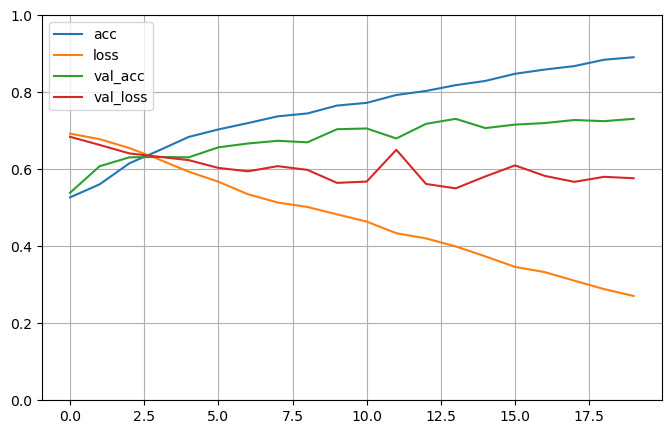

In [101]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()